# Init

In [ ]:
! pip install setuptools==65.5.0
! pip install -q stable_baselines3
! pip install -q PyPortfolioOpt
! pip install -q yahoo-finance
! pip install -q yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-65.5.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
pyfolio 0.9.2 requires empyrical>=0.5.0, but you have empyrical 0.3.4 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
pyfolio 0.9.2 requires empyrical>=0.5.0, but you have empyrical 0.3.4 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install setuptools==65.5.0
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-65.5.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
pyfolio 0.9.2 r

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-8n9y6ut8
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-8n9y6ut8
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 7414adb012b554f7c684d4615830dc5c31a094d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-7g620b7h/elegantrl_c06f92e853b44b85a9873c78b1a170e7
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-7g620b7h/elegantrl_c06f92e853b44b85a9873c78b1a170e7
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 0c019eec035391dbe7aca1464ed6a0067e5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)
/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import sys
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import copy
from typing import Any, Dict, List, Optional, Tuple, Type, TypeVar, Union
import torch as th
from torch.nn import functional as F
from stable_baselines3 import PPO,SAC
from stable_baselines3.common.buffers import ReplayBuffer
from stable_baselines3.common.noise import ActionNoise
from stable_baselines3.common.off_policy_algorithm import OffPolicyAlgorithm
from stable_baselines3.common.policies import BasePolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import get_parameters_by_name, polyak_update
from stable_baselines3.sac.policies import CnnPolicy, MlpPolicy, MultiInputPolicy, SACPolicy
import yfinance as yf
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas_datareader import data as pdr
import numpy as np
import random
import math
import time
import gym
from gym.utils import seeding
from gym import spaces
from stable_baselines3.common.vec_env import DummyVecEnv
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions
from pypfopt.efficient_frontier import EfficientFrontier
import torch
from collections import namedtuple, deque
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Dataset

In [ ]:
# tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "BAC", "V", "JNJ"]

# # start_date = '2013-06-04'
# # end_date = "2022-11-20"
# df = yf.download(tickers, interval="60m", period="730d")
# df = df.dropna(axis=0)
# data = df.copy()
# data = data['Adj Close']
# data.shape

# train_pct = 1
# samples_train = int(train_pct*len(data))
# # print(len(data))
# data_train = data[:samples_train]
# data_test = data[samples_train:]

# plt.rcParams["figure.figsize"] = (10, 6)
# for i in tickers:
#     plt.plot(data[i], label=i)
# # only one line may be specified; full height
# plt.legend()
# plt.margins(x=0)
# plt.ylabel("Closing Share Prise (USD)")
# plt.xlabel("Time")
# plt.savefig('StockPrice.png', bbox_inches='tight')

In [ ]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-01'
TRADE_END_DATE = '2023-03-01'

In [ ]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(97013, 8)

In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.496293,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.888962,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.551666,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777538,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.934715,7325600,CAT,0


## Preprocess

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3310, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2010-01-04,AAPL,7.622500,7.660714,7.585000,6.496293,493729600.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,6.496293,6.496293,20.040001,0.0
1,2010-01-04,AMGN,56.630001,57.869999,56.560001,42.888962,5277400.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,42.888962,42.888962,20.040001,0.0
2,2010-01-04,AXP,40.810001,41.099998,40.389999,33.551666,6894300.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,33.551666,33.551666,20.040001,0.0
3,2010-01-04,BA,55.720001,56.389999,54.799999,43.777538,6186700.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,43.777538,43.777538,20.040001,0.0
4,2010-01-04,CAT,57.650002,59.189999,57.509998,40.934715,7325600.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,40.934715,40.934715,20.040001,0.0
5,2010-01-04,CRM,18.652500,18.882500,18.547501,18.705000,7906000.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,18.705000,18.705000,20.040001,0.0
6,2010-01-04,CSCO,24.110001,24.840000,24.010000,17.264452,59853700.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,17.264452,17.264452,20.040001,0.0
7,2010-01-04,CVX,78.199997,79.199997,78.160004,46.851875,10173800.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,46.851875,46.851875,20.040001,0.0
8,2010-01-04,DIS,32.500000,32.750000,31.870001,27.933922,13700400.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,27.933922,27.933922,20.040001,0.0
9,2010-01-04,GS,170.050003,174.250000,169.509995,139.862854,9135000.0,0.0,0.0,6.517797,6.486023,100.0,66.666667,100.0,139.862854,139.862854,20.040001,0.0


In [ ]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


85753
10237


In [ ]:
train.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2956,2021-09-30,UNH,401.489990,403.489990,390.459991,383.180176,3779900.0,3.0,-4.349256,419.212246,386.863782,40.895387,-222.938250,41.980385,405.947464,405.438421,23.139999,24.872116
2956,2021-09-30,V,227.580002,228.789993,222.630005,219.829193,7128500.0,3.0,-1.535731,228.194388,216.108281,44.078984,-54.593348,19.569853,224.339924,231.029020,23.139999,24.872116
2956,2021-09-30,VZ,54.500000,54.509998,54.000000,49.011551,18736600.0,3.0,-0.233667,50.131164,48.744037,41.824929,-102.798803,21.682953,49.605026,50.130593,23.139999,24.872116
2956,2021-09-30,WBA,48.790001,48.930000,46.919998,43.957283,6449400.0,3.0,-0.253540,48.531811,43.597245,44.613715,-107.390228,0.941150,45.886550,44.857786,23.139999,24.872116
2956,2021-09-30,WMT,140.639999,141.729996,139.250000,135.599655,7485900.0,3.0,-1.548953,145.602013,135.119839,40.165780,-151.532325,45.466733,141.806621,140.712196,23.139999,24.872116


In [ ]:
trade.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-10-01,AAPL,141.899994,142.919998,139.110001,141.208939,94639600.0,4.0,-1.701135,155.168226,136.942771,46.927715,-142.198386,41.749873,146.968515,146.067378,21.1,120.123498
0,2021-10-01,AMGN,213.589996,214.610001,210.800003,203.845886,2629400.0,4.0,-3.097330,212.767984,199.379589,40.408553,-96.756936,36.189244,208.480833,217.103342,21.1,120.123498
0,2021-10-01,AXP,168.500000,175.119995,168.479996,170.065369,3956000.0,4.0,2.273328,174.218856,149.232889,56.265106,117.538458,15.667511,161.215662,163.458887,21.1,120.123498
0,2021-10-01,BA,222.850006,226.720001,220.600006,226.000000,9113600.0,4.0,0.730320,226.909442,205.727561,51.614047,116.649440,2.027170,217.175334,221.968500,21.1,120.123498
0,2021-10-01,CAT,192.899994,195.869995,191.240005,186.913437,3695500.0,4.0,-3.620669,204.625179,180.453266,41.999417,-112.106571,36.203176,195.930334,199.439525,21.1,120.123498


In [ ]:
INDICATORS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


# Agents Train and Save

In [ ]:
from stable_baselines3 import A2C,PPO,DDPG

In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "model_name" : "RSAC",
    "mode" : "train",
    "print_verbosity" : 1
}


## PPO

In [ ]:
env = StockTradingEnv(df = train, **env_kwargs)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)
model.save("ppo_stock")

## A2C

In [ ]:
env = StockTradingEnv(df = train, **env_kwargs)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)
model.save("a2c_stock")

## DDPG

In [ ]:
env = StockTradingEnv(df = train, **env_kwargs)

model = DDPG("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)
model.save("ddpg_stock")

# Agent Load

In [ ]:
a2c_model = A2C.load('a2c_stock.zip')
ppo_model = PPO.load('ppo_stock.zip')
ddpg_model = DDPG.load('ddpg_stock.zip')

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(


# Test

In [ ]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

In [ ]:
def DRL_prediction(model, environment, deterministic=True):
      test_env, test_obs = environment.get_sb_env()
      """make a prediction"""
      account_memory = []
      actions_memory = []
      #         state_memory=[] #add memory pool to store states
      observation = test_env.reset()
      for i in range(len(environment.df.index.unique())):
          action = select_action(model.actor,observation)
          # account_memory = test_env.env_method(method_name="save_asset_memory")
          # actions_memory = test_env.env_method(method_name="save_action_memory")
          observation, reward, terminated, _ = test_env.step(action)
          if i == (len(environment.df.index.unique()) - 2):
              account_memory = test_env.env_method(method_name="save_asset_memory")
              actions_memory = test_env.env_method(method_name="save_action_memory")
          #                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
          if terminated:
              print("hit end!")
              break
      return account_memory[0], actions_memory[0]

In [ ]:
def DRL_prediction2(model, environment, deterministic=True):
      test_env, test_obs = environment.get_sb_env()
      """make a prediction"""
      account_memory = []
      actions_memory = []
      #         state_memory=[] #add memory pool to store states
      observation = test_env.reset()
      for i in range(len(environment.df.index.unique())):
          action = model.predict(observation)[0]
          # account_memory = test_env.env_method(method_name="save_asset_memory")
          # actions_memory = test_env.env_method(method_name="save_action_memory")
          observation, reward, terminated, _ = test_env.step(action)
          if i == (len(environment.df.index.unique()) - 2):
              account_memory = test_env.env_method(method_name="save_asset_memory")
              actions_memory = test_env.env_method(method_name="save_action_memory")
          #                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
          if terminated:
              print("hit end!")
              break
      return account_memory[0], actions_memory[0]

In [ ]:
trained_model = ppo_model
df_account_value_ppo, df_actions_ppo = DRL_prediction2(
    model=trained_model, 
    environment = e_trade_gym)

day: 352, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 908081.24
total_reward: -91918.76
total_cost: 72831.57
total_trades: 8981
Sharpe: -0.280
hit end!


In [ ]:
trained_model = a2c_model
df_account_value_a2c, df_actions_a2c = DRL_prediction2(
    model=trained_model, 
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day: 352, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 1013766.50
total_reward: 13766.50
total_cost: 51865.39
total_trades: 8078
Sharpe: 0.147
hit end!


In [ ]:
trained_model = ddpg_model
df_account_value_ddpg, df_actions_ddpg = DRL_prediction2(
    model=trained_model, 
    environment = e_trade_gym)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day: 352, episode: 8
begin_total_asset: 1000000.00
end_total_asset: 1033054.00
total_reward: 33054.00
total_cost: 999.00
total_trades: 3520
Sharpe: 0.221
hit end!


In [ ]:
!pip install -q yfinance
import pyfolio as pf
from finrl.plot import get_daily_return
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_daily_return_ddpg = get_daily_return(df_account_value_ddpg)
df_daily_return_ppo = get_daily_return(df_account_value_ppo)
df_daily_return_a2c = get_daily_return(df_account_value_a2c)

In [ ]:
df_account_value_rac = pd.read_csv('/content/df_account_value_rac.csv')
df_actions_rac = pd.read_csv('/content/df_actions_rac.csv')
df_account_value_rac = df_account_value_rac.drop(['Unnamed: 0'],axis=1) 
df_account_value_ppot = pd.read_csv('/content/df_account_value_rac.csv')
df_account_value_ppot = df_account_value_ppot.drop(['Unnamed: 0'],axis=1) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_daily_return_rac = get_daily_return(df_account_value_rac)
df_daily_return_ppot = get_daily_return(df_account_value_ppot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import seaborn as sns
sns.set_theme()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
x = np.asarray(df_account_value_rac.date.unique()[:], dtype='datetime64[s]') 

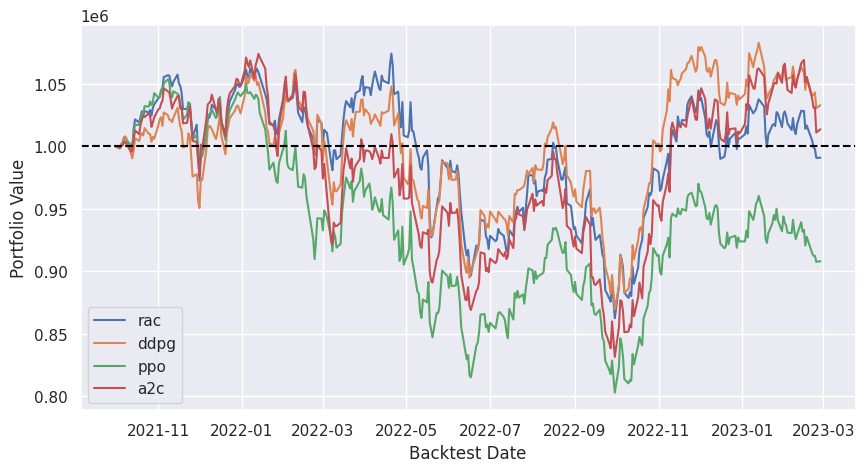

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,df_account_value_rac.iloc[:,1],label='rac')
plt.plot(x,df_account_value_ddpg.iloc[:,1],label='ddpg')
plt.plot(x,df_account_value_ppo.iloc[:,1],label='ppo')
plt.plot(x,df_account_value_a2c.iloc[:,1],label='a2c')

plt.axhline(y=1e6, color='black', linestyle='--')
plt.xlabel('Backtest Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_a2c, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ppo, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ddpg, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_rac, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ppot, return_fig=True)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2021-10-13
End date,2023-02-27
Total months,16
,Backtest
Annual return,7.8%
Cumulative returns,10.8%
Annual volatility,19.0%
Sharpe ratio,0.49
Calmar ratio,0.46
Stability,0.02
Max drawdown,-16.9%


AttributeError: ignored

In [ ]:
df_dji_ = get_baseline(
        ticker="^DJI", 
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)

In [ ]:
df_dji_stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_rac['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji.to_csv("df_dji+.csv")

In [ ]:
df_dji

In [ ]:
df_dji_daily_returns = get_daily_return(df_dji)
df_dji_daily_returns

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_rac, benchmark_rets = df_dji_daily_returns,return_fig=True)